In [1]:
#import pandas
import pandas as pd
X_train = pd.read_csv("train/X_train.csv")
X_test = pd.read_csv("test/X_test.csv")
y_train = pd.read_csv("train/y_train.csv")
y_test = pd.read_csv("test/y_test.csv")

In [2]:
#------------------ KNN CLASSIFIER ----------------------------

In [3]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

grid_params = {
    'n_neighbors' : [3,5,7,9,11,15,19],
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan']
}

gs = GridSearchCV(
    KNeighborsClassifier(),
    grid_params,
    verbose = 1,
    cv = 3,
    n_jobs = -1
)

gs_results = gs.fit(X_train, y_train)
print('best score: ' + str(gs_results.best_score_))
print('best estimator: ' + str(gs_results.best_estimator_))
print('best params: ' + str(gs_results.best_params_))

Fitting 3 folds for each of 28 candidates, totalling 84 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


best score: 0.9971509971509972
best estimator: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
best params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed:    1.5s finished
C:\Users\Eduardo Nunes\.conda\envs\udacity-projetofinal\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


C:\Users\Eduardo Nunes\.conda\envs\udacity-projetofinal\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       108
           1       1.00      1.00      1.00        43

    accuracy                           1.00       151
   macro avg       1.00      1.00      1.00       151
weighted avg       1.00      1.00      1.00       151

Confusion matrix, without normalization
[[108   0]
 [  0  43]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


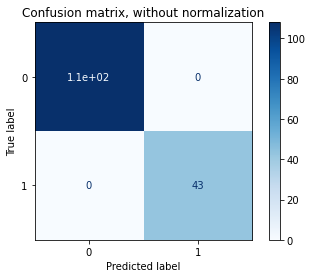

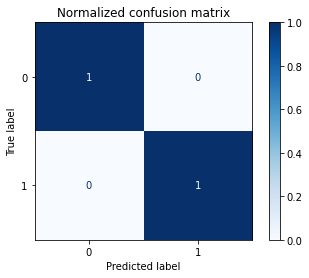

In [4]:
knn = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 3, weights= 'distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print('accuracy: ' + str(accuracy_score(y_test, y_pred)))

print(classification_report(y_test, y_pred))

class_names = [0,1]
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()